# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Virdi Rizky Elnanda - 1301210490
2. Raihan Abdurrahman - 1301210340
3. Muhammad Sultan Nurrochman - 1301213237

## Latar Belakang
Dalam era biologi molekuler dan bioinformatika, analisis data mengenai fisiko-kimia struktur tersier protein memiliki peran yang sangat penting dalam pemahaman sifat dan fungsi protein. Penggunaan metode Machine Learning, seperti SVM (Support Vector Machine) Linear, memungkinkan kita untuk mengembangkan model yang dapat memprediksi sifat-sifat fisikokimia protein berdasarkan data eksperimental. Dalam konteks ini, SVM Linear dapat digunakan untuk mengklasifikasikan dan memahami relasi kompleks antara parameter-parameter fisikokimia yang berkaitan dengan struktur protein, memberikan pandangan yang lebih mendalam terhadap interaksi molekuler protein, serta mendukung penemuan makna dalam data biologis tersebut.

# Additional Variable Information
RMSD-Size of the residue.

F1 - Total surface area.

F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue.

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).

In [ ]:
# Exploration Data Analysis
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", 30)

df = pd.read_csv('CASP.csv')
df #membaca dan menampilkan data

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


In [ ]:
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [ ]:
df.tail()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.746,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.277,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.678,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.195,3421.79,41,35.6045
45729,18.827,12732.40,4444.36,0.34905,157.6300,1.788897e+06,229.459,4626.85,141,29.8118


In [ ]:
# Memeriksa kelengkapan data
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [ ]:
len(df)

45730

In [ ]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [ ]:
df.isnull().sum()

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64

## NORMALISASI

In [ ]:
# Mencari nilai minimum dan maksimum dari setiap fitur
min = df.min(axis=0)
max = df.max(axis=0)

# Menormalisasi data 0-1
df = (df - min) / (max - min)
df

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.823087,0.296637,0.261720,0.463818,0.423008,0.301464,0.323758,0.040471,0.291429,0.294518
1,0.286728,0.100946,0.081810,0.349616,0.119996,0.093926,0.097508,0.031420,0.111429,0.581909
2,0.441688,0.141698,0.088727,0.269853,0.158712,0.146755,0.087955,0.028137,0.082857,0.588525
3,0.754845,0.160257,0.131787,0.388734,0.160226,0.172921,0.136765,0.030659,0.200000,0.594843
4,0.379161,0.134655,0.089442,0.289165,0.117274,0.136153,0.110432,0.026564,0.117143,0.616045
...,...,...,...,...,...,...,...,...,...,...
45725,0.179151,0.149964,0.159250,0.521651,0.150495,0.152606,0.142603,0.031942,0.240000,0.538409
45726,0.310539,0.148414,0.141199,0.457347,0.182602,0.154727,0.124121,0.037514,0.154286,0.519528
45727,0.493166,0.141716,0.139926,0.473423,0.169022,0.146932,0.126594,0.031057,0.131429,0.555083
45728,0.466260,0.172327,0.177904,0.518683,0.233202,0.179092,0.146926,0.032297,0.117143,0.508486


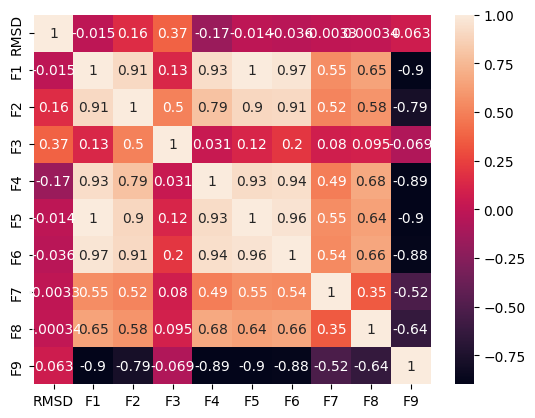

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
#Kode ini memilih kolom-kolom dalam DataFrame df yang memiliki tipe data numerik
#(seperti integer atau float) dan menyimpannya dalam DataFrame baru yang disebut numeric_df.
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2g') #untuk membuat heatmap
plt.show()

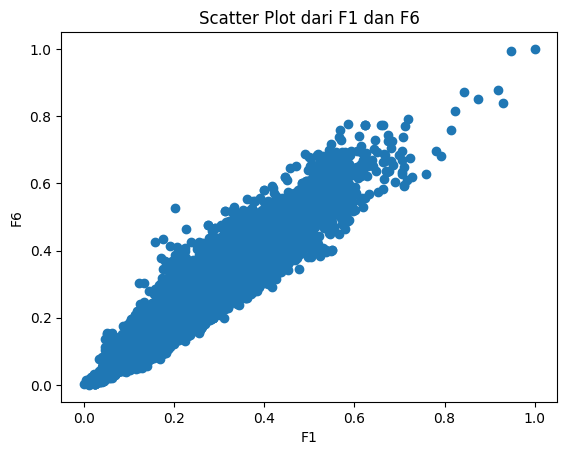

In [ ]:
plt.scatter(numeric_df['F1'], numeric_df['F6'])
plt.xlabel('F1')
plt.ylabel('F6')
plt.title('Scatter Plot dari F1 dan F6')
plt.show()

In [ ]:
# Mengetahui target fitur dengan korelasi cukup tinggi yaitu lebih dari 0.1 atau kurang dari -0.1
df.corr()["RMSD"][(df.corr()["RMSD"] > 0.1) | (df.corr()["RMSD"] < -0.1)]

RMSD    1.000000
F2      0.156895
F3      0.374309
F4     -0.169771
Name: RMSD, dtype: float64

In [ ]:
selected_column = df.corr()["RMSD"][(df.corr()["RMSD"] > 0.1) | (df.corr()["RMSD"] < -0.1)].index
#Ini adalah ekspresi logika yang menghasilkan serangkaian nilai True atau False tergantung pada apakah nilai korelasi "RMSD" melebihi 0.1 atau kurang dari -0.1.

In [ ]:
df = df.copy()[selected_column]

## Ringkasan Metode
Metode yang digunakan dalam tugas ini adalah SVR. Metode SVR (Support Vector Regression) adalah varian dari Support Vector Machine (SVM) yang digunakan untuk tugas regresi. Tujuan dari SVR adalah membangun model yang dapat memprediksi nilai variabel target berdasarkan fitur-fitur yang ada dalam data.

In [ ]:
# Baseline Model
# Inisiasi Columns

X = df.drop(columns=['RMSD'])
y = df['RMSD']

# Split data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class SVRegression:
    def __init__(self, C=1.0, max_iters=100, learning_rate=0.001):
        self.C = C  # Parameter C untuk algoritma SVM, default nilainya adalah 1.0
        self.max_iters = max_iters  # Jumlah iterasi maksimum untuk proses pelatihan, default 100
        self.learning_rate = learning_rate  # Tingkat pembelajaran untuk pembaruan model, default 0.001

    def fit(self, X, y):
        n_samples, n_features = X.shape  # Mendapatkan jumlah sampel dan fitur dari data pelatihan
        self.w = np.zeros(n_features)  # Inisialisasi vektor bobot w dengan nol sesuai dengan jumlah fitur
        self.b = 0  # Inisialisasi bias b dengan nol

        for _ in range(self.max_iters):  # Melakukan iterasi untuk proses pelatihan sebanyak max_iters
            for i in range(n_samples):  # Iterasi melalui setiap sampel dalam data pelatihan
                condition = y[i] * (np.dot(X[i], self.w) - self.b) >= 1  # Menghitung kondisi yang mempengaruhi pembaruan
                if condition:
                    self.w -= self.learning_rate * (2 * self.C * self.w)  # Memperbarui bobot jika kondisi terpenuhi
                else:
                    self.w -= self.learning_rate * (2 * self.C * self.w - np.dot(X[i], y[i]))  # Memperbarui bobot dan bias jika kondisi tidak terpenuhi
                    self.b -= self.learning_rate * y[i]

    def predict(self, X):
        return np.dot(X, self.w) - self.b  # Menghitung prediksi menggunakan produk dot antara data uji dan bobot, lalu dikurangi dengan bias



## Baseline Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Inisialisasi model SVM Regresi

svm_regressor = SVRegression()

# Training model
svm_regressor.fit(X_train.values, y_train.values)

# Prediksi data pengujian
y_pred = svm_regressor.predict(X_test)
print(f"Based Line Model:\n MSE = {mean_squared_error(y_test, y_pred)}\n R2_squared = {r2_score(y_test, y_pred)}")

Based Line Model:
 MSE = 374.8798308550992
 R2_squared = -4391.624943913243


# Hyperparameter Tuning

Kita melakukan pelatihan model dengan berbagai parameter C dan learning rate

In [ ]:
# Mendefinisikan himpunan hyperparameter yang akan diuji
hyperparameters = {
  'C': [1.0, 5.0, 10.0],
  'learning_rate': [0.00001, 0.00005, 0.000001, 0.000005]
}

# Inisialisasi struktur data untuk menyimpan hasil evaluasi
hasil = {
    "C": [],  # List untuk menyimpan nilai C yang digunakan
    "learning_rate": [],  # List untuk menyimpan tingkat pembelajaran yang digunakan
    "mse": [],  # List untuk menyimpan nilai Mean Squared Error (MSE) dari model
    "r2_square": [],  # List untuk menyimpan nilai R-squared dari model
}

# Looping untuk mencoba semua kombinasi hyperparameter
for i in range(3):  # Looping untuk nilai C
  for j in range(4):  # Looping untuk tingkat pembelajaran
    # Menyimpan nilai hyperparameter yang digunakan
    hasil["C"].append(hyperparameters["C"][i])
    hasil["learning_rate"].append(hyperparameters["learning_rate"][j])

    # Membuat objek SVM Regressor dengan hyperparameter tertentu
    svm_regressor = SVRegression(C=hyperparameters["C"][i],
                                learning_rate=hyperparameters["learning_rate"][j],
                                max_iters=100)

    # Melatih model menggunakan data pelatihan
    svm_regressor.fit(X_train.values, y_train.values)

    # Melakukan prediksi pada data uji
    pred = svm_regressor.predict(X_test)

    # Menghitung dan menyimpan MSE dan R-squared
    hasil["mse"].append(mean_squared_error(y_test, pred))
    hasil["r2_square"].append(r2_score(y_test, pred))


In [ ]:
result = pd.DataFrame(hasil)

In [ ]:
result.to_csv("hasil-tubes-ml1-mantap-fromscratch.csv")

In [ ]:
result.sort_values(by = "mse", ascending = True).reset_index().drop("index", axis = 1)

,C,learning_rate,mse,r2_square
0,10.0,0.000001,0.946530,-10.090895
1,5.0,0.000001,0.950209,-10.133997
2,1.0,0.000001,0.984215,-10.532458
3,1.0,0.000005,6.559628,-75.861930
4,5.0,0.000005,6.593948,-76.264070
5,10.0,0.000005,6.597689,-76.307901
6,1.0,0.000010,14.411000,-167.859759
7,5.0,0.000010,14.466847,-168.514144
8,10.0,0.000010,14.472866,-168.584673
9,1.0,0.000050,73.365107,-858.649869


## Hasil dan Analisis
**Data Preprocessing:**

Data diambil dari file CSV 'CASP.csv' yang berisi informasi terkait dengan struktur protein.
Dilakukan analisis data awal, termasuk pemeriksaan nilai yang hilang, normalisasi data menggunakan skala Min-Max, dan visualisasi korelasi antar fitur numerik.

**Seleksi Fitur:**

Dilakukan pemilihan fitur dengan korelasi lebih dari 0.1 atau kurang dari -0.1 dengan variabel target 'RMSD'.

**Model Dasar (Baseline Model):**

Didefinisikan kelas SVRegression untuk implementasi model Support Vector Regression (SVR) dengan metode fitting dan prediksi.
Data dibagi menjadi set data latih dan uji.
Model SVR dasar diinisialisasi, dilatih pada subset data, dan digunakan untuk membuat prediksi.

**Penyetelan Hyperparameter (Hyperparameter Tuning):**

Dilakukan penyetelan hyperparameter 'C' dan 'learning_rate' menggunakan pendekatan grid search.
Model dilatih dan dievaluasi untuk berbagai kombinasi hyperparameter.
Hasil, termasuk MSE (Mean Squared Error) dan R-squared, dicatat.



## Kesimpulan
Berdasarkan hasil yang diberikan, terlihat bahwa nilai hyperparameter C mempengaruhi performa model. Dari data yang diberikan, kita dapat mengamati beberapa pola:

**MSE (Mean Squared Error):**

Nilai MSE menunjukkan seberapa baik model mendekati data aktual. Semakin rendah MSE, semakin baik performa model.
Dari hasil yang diberikan, terlihat bahwa untuk nilai C yang lebih tinggi (10.0), MSE cenderung lebih rendah daripada untuk nilai C yang lebih rendah (1.0 atau 5.0) dengan learning rate yang sama.

**R-squared (R2 Square):**

R-squared merupakan ukuran seberapa baik model dapat menjelaskan variabilitas dari data. Nilai R2 Square berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.
Dari hasil yang diberikan, terlihat bahwa R2 Square cenderung lebih rendah (bahkan negatif) untuk semua kombinasi hyperparameter. Hal ini menunjukkan bahwa model mungkin tidak sesuai dengan data dengan baik.

Namun, perlu diingat bahwa hasil ini hanya berdasarkan pada kombinasi tertentu dari hyperparameter dan data yang digunakan. Ada kemungkinan bahwa kombinasi hyperparameter yang berbeda atau pengolahan data tambahan dapat menghasilkan hasil yang berbeda.

Oleh karena itu, dalam kasus ini, C mempengaruhi performa model dan eksplorasi lebih lanjut terkait dengan penyetelan hyperparameter mungkin diperlukan untuk meningkatkan kinerja model.